# データ分析のビジネス活用

## 組織論・マネジメント

[データ分析のマネジメント論１：データ分析組織とは何か｜Jun Ernesto Okumura](https://note.com/pacocat/n/nb2f15463ccb9)

[データ分析のマネジメント論２：アナリスト育成への向き合い方｜Jun Ernesto Okumura](https://note.com/pacocat/n/n0c83e443aeb9)


## 事例

### Booking.comのレコメンデーション

Bernardi et al. (2019) [150 Successful Machine Learning Models: 6 Lessons Learned at Booking.com](https://dl.acm.org/doi/10.1145/3292500.3330744) （KDD2019）

**1. 機械学習はビジネスに貢献する**

- お客様の旅行のcontextを予測して、子供がいたらその情報も検索欄に入れるようにリマインドする
- 各宿泊施設についてのレビューの文章を要約する
- 特定の都市の価格のトレンドなど有益な情報を提示する

などなど、多数の予測モデルでサイトを最適化している。

この効果はA/Bテストで検証され、しっかりビジネスに貢献していることが確認されている。


**2. Offline Metricsはビジネス指標とは相関しない**

これはこの論文の非常に重要な指摘で、よく引用される部分。

新しいモデルを開発して古いモデルから置き換えるとき、Offline Metricsの改善（たとえばAUCがどれだけ改善したとか）とデプロイ後のOnline Metrics (A/B testの結果）は相関しなかった。

著者らの考察：

- パフォーマンスの増加によるビジネス価値の増加は逓減する
- 不気味の谷現象：ユーザーの行動をピッタリ予測しすぎて気味悪がられる
- 中間的な指標への過度な最適化：例えばクリック率を最適化するようにモデルを作っていった結果、コンバージョンにつながらない「単にクリックさせるだけ」のモデルになっていった

ビジネス上の指標を最適化したいにもかかわらず、モデルは別の誤差関数を最適化しているのでこのようなことが起こる

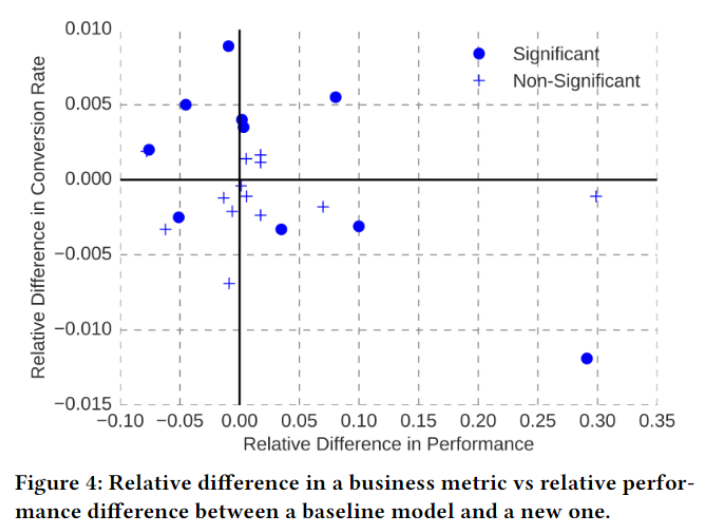

**3. Latencyの増加がビジネスに悪影響を与える**

latency（待ち時間）が増えるとビジネス指標を下げるし、逆にlatencyを下げる努力をすることでビジネスを改善できたという報告。



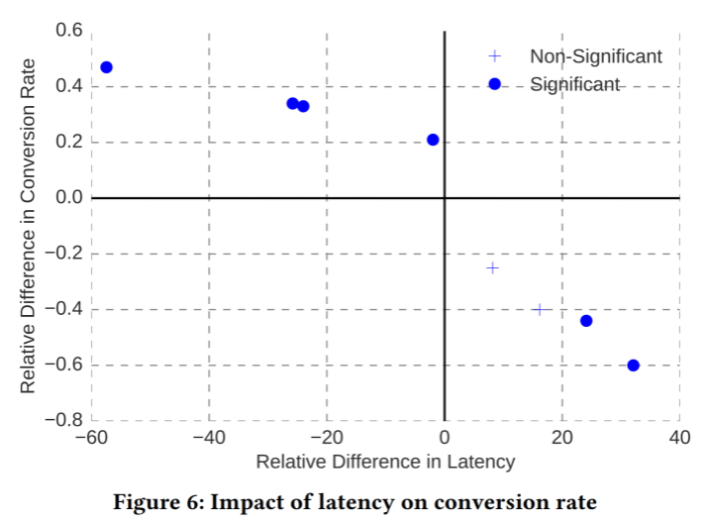

:::{card} 参考
- Bernardi, L., Mavridis, T., & Estevez, P. (2019, July). [150 Successful Machine Learning Models: 6 Lessons Learned at Booking.com](https://dl.acm.org/doi/10.1145/3292500.3330744). In Proceedings of the 25th ACM SIGKDD international conference on knowledge discovery & data mining (pp. 1743-1751).
- [「150 successful machine learning models: 6 lessons learned at booking. com」を読んだ - 盆暗の学習記録](https://nigimitama.hatenablog.jp/entry/2021/12/27/230653)
:::

### Amazonの「明日にお届け」を表示するかどうかの判断モデル

Mondal, et al. (2022). [ASPIRE: Air shipping recommendation for e-commerce products via causal inference framework.](https://dl.acm.org/doi/abs/10.1145/3534678.3539197) （KDD2022）


**課題**

Amazonにて、ある商品について「この顧客・商品は空輸してでもすぐに配送すべきか？」の判別をして「明日にお届け」を表示するかどうか決めている。既存モデルを改善したい。

**手法**

期待売上を推定し、輸送可能量の制約の下での **売上最大化問題として解く** 。

$$
\begin{aligned}
&\max _{\lambda_{1 \cdots  m}} \sum_a \underbrace{E(y \mid a)}_{\text {製品aの期待売上 }}\\
& \text { s.t. } \sum_a \underbrace{E(C \mid a)}_{\text {製品 } a \text { の輸送量 }} \leq \underbrace{B}_{\text {輸送可能量 }}
\end{aligned}
$$

Booking.com の「予測誤差を最適化してもビジネス指標は最適化されない」という指摘を活かしたような感じで、売上を直接最大化するように問題を定式化しているのが面白いポイント。

期待売上はLightGBMによるDoubly Robust Estimatorで推定する。

**結果**

online evaluation（A/Bテスト）での検証において、ベースラインのモデルよりも売上を79bps増加させたことが確認された（※bps = basis points = 0.01%）

:::{card} 参考

- [Mondal, A., Majumder, A., & Chaoji, V. (2022, August). Aspire: Air shipping recommendation for e-commerce products via causal inference framework. In Proceedings of the 28th ACM SIGKDD Conference on Knowledge Discovery and Data Mining (pp. 3584-3592).](https://dl.acm.org/doi/abs/10.1145/3534678.3539197)
- [ASPIRE: Air shipping recommendation for e-commerce products via causal inference framework - Amazon Science](https://www.amazon.science/publications/aspire-air-shipping-recommendation-for-e-commerce-products-via-causal-inference-framework)
- ["ASPIRE: Air Shipping Recommendation for E-commerce Products via Causal Inference Framework"を読んだ｜Masayoshi Mita](https://note.com/kind_ixia1/n/n3d7388449914)
:::


### LinkedInにおける対応すべき顧客のレコメンド

手法

- 解約（churn）しそうな顧客、あるいは追加購入（upsell）の可能性がある顧客をスコアリング
- スコアは営業担当者が使うCRMツール（MyBook）にランキングとして表示し、優先的に対応すべきとしてレコメンド
- スコアの理由を自然言語（文章）で説明することでユーザーの納得感を高める工夫を行った
    - この説明はルールベースで生成している。CrystalCandleという名前で別の論文でも発表している

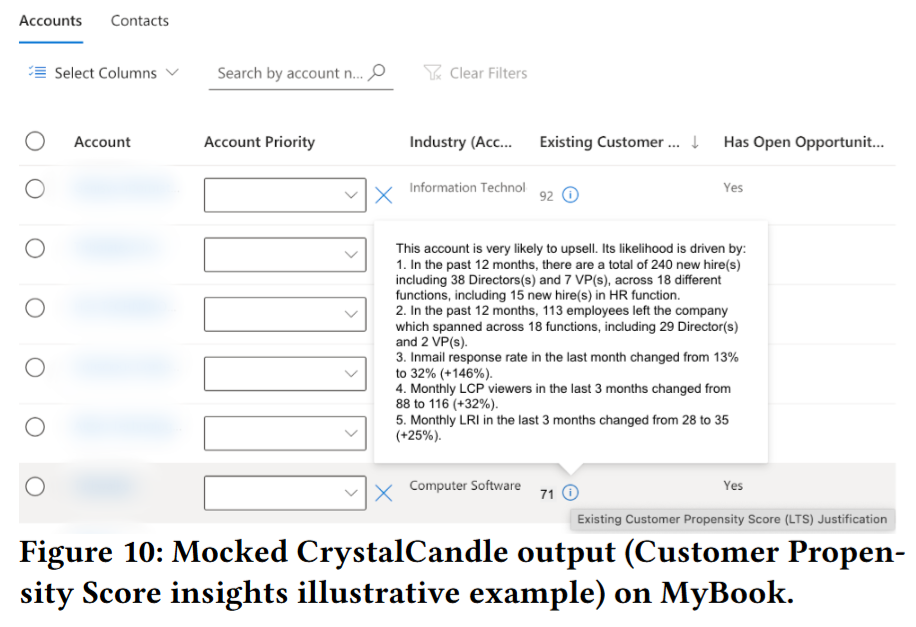

結果

- A/B testにより、このレコメンドによる契約数の+8%の増加を確認


:::{card} 参考

Jena et al. (2023). [Unlocking Sales Growth: Account Prioritization Engine with Explainable AI.](https://arxiv.org/abs/2306.07464) (KDD2023)
:::